In [1]:
from libPytorch.utility_dataset import *
from libPytorch.model_AE import *

from IPython.display import clear_output

from pylab import *
%matplotlib inline
#%qtconsole #--style monokai

# 0. Load dataset and Model

In [2]:
trnset = np.fromfile("../../data/MNIST/MNIST_train_data.dat").reshape(-1,785)
#trnset[:,:-1] = trnset[:,:-1]/np.max(trnset[:,:-1],axis=1)[:,None]
trnset  = 2*trnset-1
model   = dcAE_MNIST()

trnset  = tcDataset(trnset,shape=(-1,1,28,28))
batches = DataLoader(trnset, batch_size=100, shuffle=False)

# 1. Training

In [3]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

lossfunc  = nn.MSELoss(size_average=False)
# begin Training
for epoch in range(20):
    running_loss = 0.0
    for i, batch in enumerate(batches):
        
        # 1.get the inputs
        inputs = Variable(batch["data"])
        # 2.zero the parameter gradients
        optimizer.zero_grad()
        # 3.forward + backward + optimize 
        recons, codes = model(inputs)
        loss = lossfunc(recons, inputs)
        
        loss.backward()
        optimizer.step()
        
        
        # TRAINING DESHBOARD #
        ##################################################################
        running_loss += loss.data[0]
        if i % 100 == 99:    # print every 100 mini-batches
            print('[{:5d}, {:5d}] loss: {:5.3f}'.
                  format(epoch+1, i+1, running_loss/100))
            clear_output(wait=True)
            running_loss = 0.0
        ##################################################################

[   20,   600] loss: 2445.876


In [8]:
codes.tofile('../../data/MNIST/MNIST_train_data_AEcnn.dat')

In [10]:
codes.shape

(60000, 36)

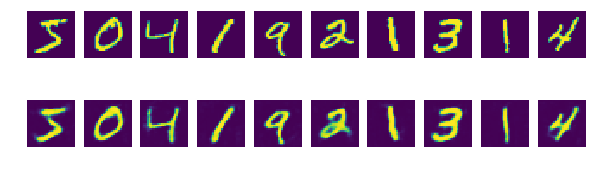

In [7]:
fig = plt.figure(figsize=(10,3))
ncol = 10
for col in range(ncol):
    plt.subplot(2,ncol,col+1)
    a = trnset[col]['data']
    a = a.reshape(28,28).T
    plt.imshow(a)
    plt.axis('off')
    
    plt.subplot(2, ncol,ncol+col+1)
    a = recons[col]
    a = a.reshape(28,28).T
    #a = a/a.max()
    #a[a<1e-3] = np.zeros_like(a)[a<1e-3]
    #a[a>6e-1] = np.ones2_like(a)[a>7e-1]
    plt.imshow(a)
    plt.axis('off')

In [9]:
torch.save(model.cpu(),'../../data/model/MNIST_AEcnn.pt') 

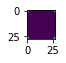

In [13]:
    plt.subplot(2, ncol,ncol+col+1)
    a = recons[col]
    a = a.reshape(28,28).T
    plt.imshow(a)